# Step 1: Import necessary libraries
Importing essential libraries for neural networks, data processing, and visualization.
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

# Step 2: Load the dataset
Load the classic MNIST dataset, consisting of 70,000 images of handwritten digits (0-9).

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


# Step 3: Preprocess the Dataset
Normalize the pixel values to be between 0 and 1 to help the neural network learn. Flatten the 2D images into a 1D array to feed into a fully connected neural network.

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


# Step 4: Build the Neural Network Model
Define a simple neural network with an input layer, one hidden layer, and an output layer for 10 classes.

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Input layer with 128 neurons
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Compile the Model
Compile the model with categorical cross-entropy as the loss function and Adam as the optimizer.

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For non-one-hot encoded labels
    metrics=['accuracy']  # Track accuracy during training
)


# Step 6: Train the Model
Train the model with the training data for 10 epochs, using a batch size of 128. Use validation data to evaluate performance on unseen data during training.

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Train for 10 epochs
    batch_size=128,  # Batch size for training
    verbose=2  # Display training progress
)


Epoch 1/10
469/469 - 4s - 8ms/step - accuracy: 0.8643 - loss: 0.4502 - val_accuracy: 0.9484 - val_loss: 0.1724
Epoch 2/10
469/469 - 1s - 3ms/step - accuracy: 0.9420 - loss: 0.1992 - val_accuracy: 0.9621 - val_loss: 0.1229
Epoch 3/10
469/469 - 1s - 3ms/step - accuracy: 0.9550 - loss: 0.1489 - val_accuracy: 0.9697 - val_loss: 0.0984
Epoch 4/10
469/469 - 1s - 3ms/step - accuracy: 0.9633 - loss: 0.1234 - val_accuracy: 0.9708 - val_loss: 0.0932
Epoch 5/10
469/469 - 1s - 3ms/step - accuracy: 0.9671 - loss: 0.1058 - val_accuracy: 0.9743 - val_loss: 0.0842
Epoch 6/10
469/469 - 1s - 3ms/step - accuracy: 0.9711 - loss: 0.0936 - val_accuracy: 0.9758 - val_loss: 0.0789
Epoch 7/10
469/469 - 1s - 3ms/step - accuracy: 0.9733 - loss: 0.0850 - val_accuracy: 0.9765 - val_loss: 0.0761
Epoch 8/10
469/469 - 1s - 3ms/step - accuracy: 0.9761 - loss: 0.0751 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 9/10
469/469 - 1s - 3ms/step - accuracy: 0.9771 - loss: 0.0710 - val_accuracy: 0.9793 - val_loss: 0.0712
E

# Step 7: Plot Training and Validation Accuracy
Plot the accuracy values during training and validation to track progress.

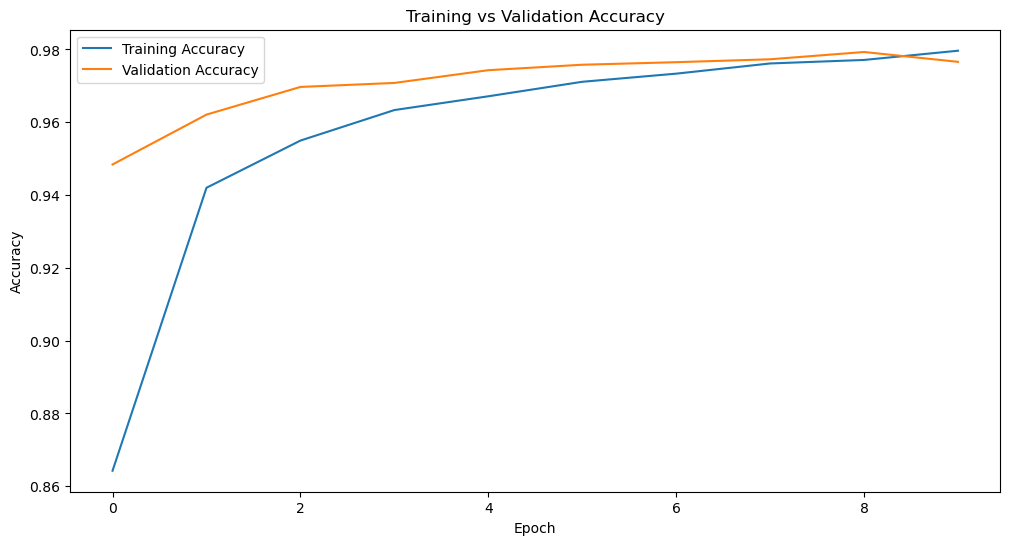

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


# Step 8: Plot Training and Validation Loss
Plot the loss values during training and validation. A decreasing loss indicates learning.

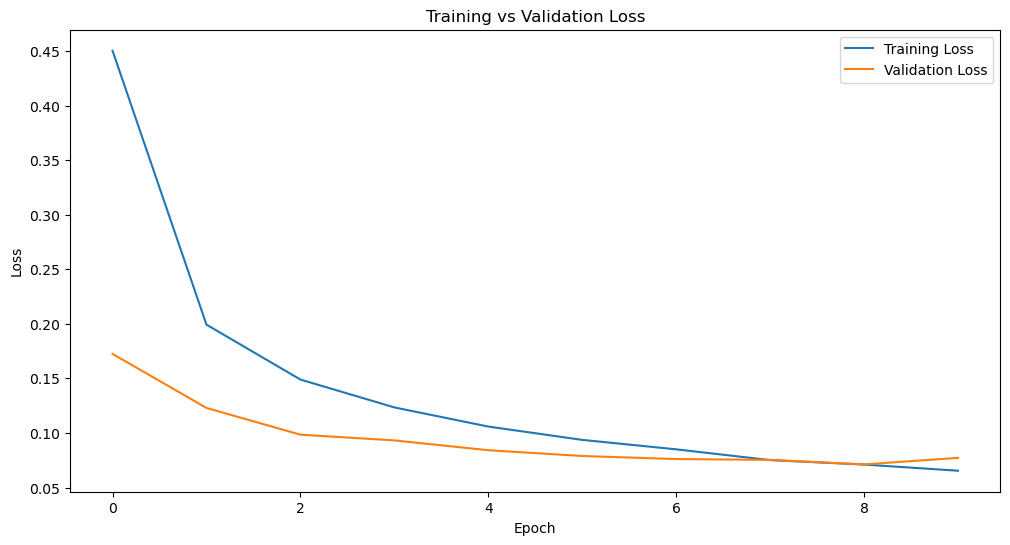

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


# Step 9: Generate Predictions on the Test Set
After training, use the model to make predictions on the test set to evaluate performance.



In [16]:
y_pred = np.argmax(model.predict(X_test), axis=1)  # Get the class with the highest probability


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Step 10: Create a Confusion Matrix
A confusion matrix is a visualization tool to understand the accuracy of predictions in each category.

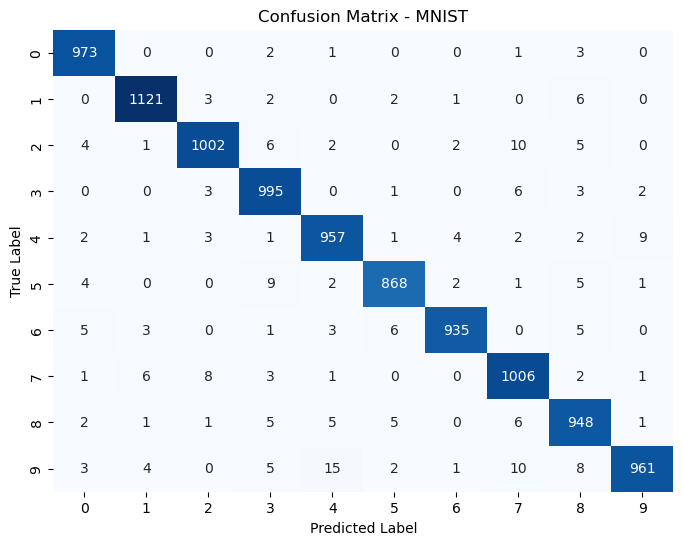

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST')
plt.show()


# Step 11: Display the Classification Report
A classification report provides additional metrics such as precision, recall, and F1-score.

In [18]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

